In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy import stats

# 1. BASELINE MODEL

In [ ]:
player_id = 355 
url_player = f'https://fantasy.premierleague.com/api/element-summary/{player_id}/'
api_result_player = requests.get(url_player).json()
stats = api_result_player['history']
df_stats = pd.json_normalize(stats)
df_stats.index = np.arange(1, len(df_stats) + 1)
features = ['opponent_team', 'was_home', 'minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']
df_stats.columns.values

# features = ['element', 'opponent_team', 'was_home', 'total_points']

In [ ]:
df_stats = df_stats[features]
#df_stats['avg_points'] = df_stats.total_points.rolling(window=3, closed = 'left', min_periods = 1).mean()

In [ ]:
df_stats

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_stats[['avg_points']], df_stats['total_points'], test_size=0.3, random_state=0)

In [ ]:
class MyBaselineEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.column_name]

    def predict(self, X):
        return self.transform(X)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline_champion = Pipeline([
    ('classifier', MyBaselineEstimator('avg_points')),
])
pipeline_challenger = Pipeline([
    ('LinearRegression', LinearRegression())
     ])

In [ ]:
def compare_two_pipelines_performance(pipeline_champion, pipeline_challenger,
                                      X_train, X_test, y_train, y_test):
    # Train pipeline1
    pipeline_champion.fit(X_train, y_train)
    y_pred_champion = pipeline_champion.predict(X_test)
    # Train pipeline2
    pipeline_challenger.fit(X_train, y_train)
    y_pred_challenger = pipeline_challenger.predict(X_test)
    # Compute the accuracy of pipeline1
    champion_accuracy = root_mean_squared_error(y_test, y_pred_champion)
    # Compute the accuracy of pipeline2
    challenger_accuracy = root_mean_squared_error(y_test, y_pred_challenger)
    print(f"pipeline_champion accuracy: {champion_accuracy}")
    print(f"pipeline_challenger accuracy: {challenger_accuracy}")
    return champion_accuracy, challenger_accuracy

In [ ]:
compare_two_pipelines_performance(pipeline_champion, pipeline_challenger, X_train, X_test, y_train, y_test)

# 2. EXTRACT AND TRANSFORM DATA

**ALL OF THE CELLS RELATED TO THE API CALL ARE NOW HASHED DUE TO THE FACT THE SEASON IS OVER AND WE CAN NO LOGER GET THE DATA ON PREVIOUS SEASON**

In [ ]:
# Let's create dataframe df_players_stats including all the data on players performance in each game
# d = {'element': [], 'opponent_team': [], 'was_home': [], 'minutes': [],'total_points': [], 'goals_scored': [], 'assists': [], 'expected_goals': [], 'expected_assists': [], 'clean_sheets': []}
# df_players_stats = pd.DataFrame(d)
# columns = ['element', 'opponent_team', 'was_home', 'minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']

# for i in range(1, 839):
#     url = f'https://fantasy.premierleague.com/api/element-summary/{i}/'
#     try:
#         api_result = requests.get(url).json()
#         stats = api_result['history']
#         df_stats = pd.json_normalize(stats)
#         df_stats.index = np.arange(1, len(df_stats) + 1)
#         df_stats = df_stats.reindex(columns=columns)
#         df_stats['avg_minutes'] = df_stats.minutes.rolling(window=3, closed = 'left', min_periods = 1).mean()
#         df_stats['avg_points'] = df_stats.total_points.rolling(window=3, closed = 'left', min_periods = 1).mean()
#         df_stats['avg_goals'] = df_stats.goals_scored.rolling(window=3, closed = 'left', min_periods = 1).mean()
#         df_stats['avg_xG'] = df_stats.expected_goals.rolling(window=3, closed = 'left', min_periods = 1).mean()
#         df_stats['avg_assists'] = df_stats.assists.rolling(window=3, closed = 'left', min_periods = 1).mean()
#         df_stats['avg_xA'] = df_stats.expected_assists.rolling(window=3, closed = 'left', min_periods = 1).mean()
#         df_stats['clean_sheets_last3'] = df_stats.clean_sheets.rolling(window=3, closed = 'left', min_periods = 1).sum()
#         df_players_stats = pd.concat([df_players_stats, df_stats])
#     except Exception as e:
#         print(f'Error fetching data for player {i}: {e}')
#         continue

# df_players_stats.index = np.arange(1, len(df_players_stats) + 1)

In [ ]:
df_players_stats

In [ ]:
# After creation of df_players_stats dataframe let's clean the data and prepare it for further predictions
# df_players_stats.avg_points = df_players_stats.avg_points.fillna(1)
# df_players_stats.avg_minutes = df_players_stats.avg_minutes.fillna(0)
# df_players_stats.avg_goals = df_players_stats.avg_goals.fillna(0)
# df_players_stats.avg_xG = df_players_stats.avg_xG.fillna(0)
# df_players_stats.avg_assists = df_players_stats.avg_assists.fillna(0)
# df_players_stats.avg_xA = df_players_stats.avg_xA.fillna(0)
# df_players_stats.clean_sheets_last3 = df_players_stats.clean_sheets_last3.fillna(0)
# df_players_stats['avg_points'] = round(df_players_stats['avg_points'], 2)
# df_players_stats['avg_minutes'] = round(df_players_stats['avg_minutes'], 2)
# df_players_stats['avg_goals'] = round(df_players_stats['avg_goals'], 2)
# df_players_stats['avg_xG'] = round(df_players_stats['avg_xG'], 2)
# df_players_stats['avg_assists'] = round(df_players_stats['avg_assists'], 2)
# df_players_stats['avg_xA'] = round(df_players_stats['avg_xA'], 2)
# df_players_stats['was_home'] = df_players_stats['was_home'].astype('bool')
# df_players_stats['opponent_team'] = df_players_stats['opponent_team'].astype('int')
# df_players_stats['element'] = df_players_stats['element'].astype('int64')

# df_players_stats.describe()

In [ ]:
df_players_stats

In [ ]:
#Column 'elements' has to many values to be one hot encoded. Let's join the 'element_type' column from df_players table to group players by their position.
df_players = pd.read_csv('data dumps/df_players.csv')
df_players = df_players.rename(columns = {"id" : "element"})
df_players.set_index(['element'], inplace = True)
df_players_stats = df_players_stats.join(df_players['element_type'], on = 'element', how = 'left')
df_players_stats['element_type'] = df_players_stats['element_type'].astype('string')
df_players_stats

In [ ]:
#Let's introduce df_teams column and then join the 'strength' value to df_players_stats
df_teams = pd.read_csv('data dumps/df_team.csv')
df_teams = df_teams.rename(columns = {"id" : "opponent_team"})
df_teams.drop(columns = ['name', 'strength_overall_home', 'strength_overall_away', 'strength_attack_home', 'strength_attack_away', 'strength_defence_home', 'strength_defence_away'], inplace = True)
df_teams

In [ ]:
df_teams.set_index(['opponent_team'], inplace = True)
df_players_stats = df_players_stats.join(df_teams['strength'], on = 'opponent_team', how = 'left')
df_players_stats = df_players_stats.rename(columns={"strength": "opponent_strength"})

In [ ]:
# Save dataframe to csv for future use
df_players_stats.to_csv(path_or_buf='df_players_stats.csv', index = False)

In [ ]:
#Let's implement one hot encoding on the 'element_type' column
df_players_stats = pd.read_csv('df_players_stats.csv')
oh_element_type = pd.get_dummies(df_players_stats['element_type'])
df_players_stats.drop('element_type', axis = 1, inplace = True)
df_players_stats = df_players_stats.join(oh_element_type)
df_players_stats = df_players_stats.rename(columns = {1 : 'element_type_1', 2 : 'element_type_2', 3 : 'element_type_3', 4 : 'element_type_4'})
df_players_stats['element_type_1'] = df_players_stats['element_type_1'].astype('int64')
df_players_stats['element_type_2'] = df_players_stats['element_type_2'].astype('int64')
df_players_stats['element_type_3'] = df_players_stats['element_type_3'].astype('int64')
df_players_stats['element_type_4'] = df_players_stats['element_type_4'].astype('int64')

In [ ]:
#Let's do the same for the 'opponent_team' column
#oh_opponent_team = pd.get_dummies(df_players_stats['opponent_team'])
#df_players_stats.drop('opponent_team', axis = 1, inplace = True)
#df_players_stats = df_players_stats.join(oh_opponent_team)
#for i in range (1,21):
#    df_players_stats = df_players_stats.rename(columns = {i : 'opponent_' + f'{i}'})
#for i in range (1,21):
#    df_players_stats[f'opponent_{i}'] = df_players_stats[f'opponent_{i}'].astype('int64')

In [ ]:
df_players_stats

In [ ]:
df_players_stats['was_home'] = df_players_stats['was_home'].astype('int64')
df_players_stats['clean_sheets_last3'] = df_players_stats['clean_sheets_last3'].astype('int64')

In [ ]:
# Save dataframe to csv for future use
df_players_stats.to_csv(path_or_buf='df_players_stats_oh.csv', index = False)

## 2.1 PLOTS

In [10]:
df = pd.read_csv('df_players_stats.csv')
df.columns

Index(['element', 'opponent_team', 'was_home', 'minutes', 'total_points',
       'goals_scored', 'assists', 'expected_goals', 'expected_assists',
       'clean_sheets', 'avg_minutes', 'avg_points', 'avg_goals', 'avg_xG',
       'avg_assists', 'avg_xA', 'clean_sheets_last3', 'element_type',
       'opponent_strength'],
      dtype='object')

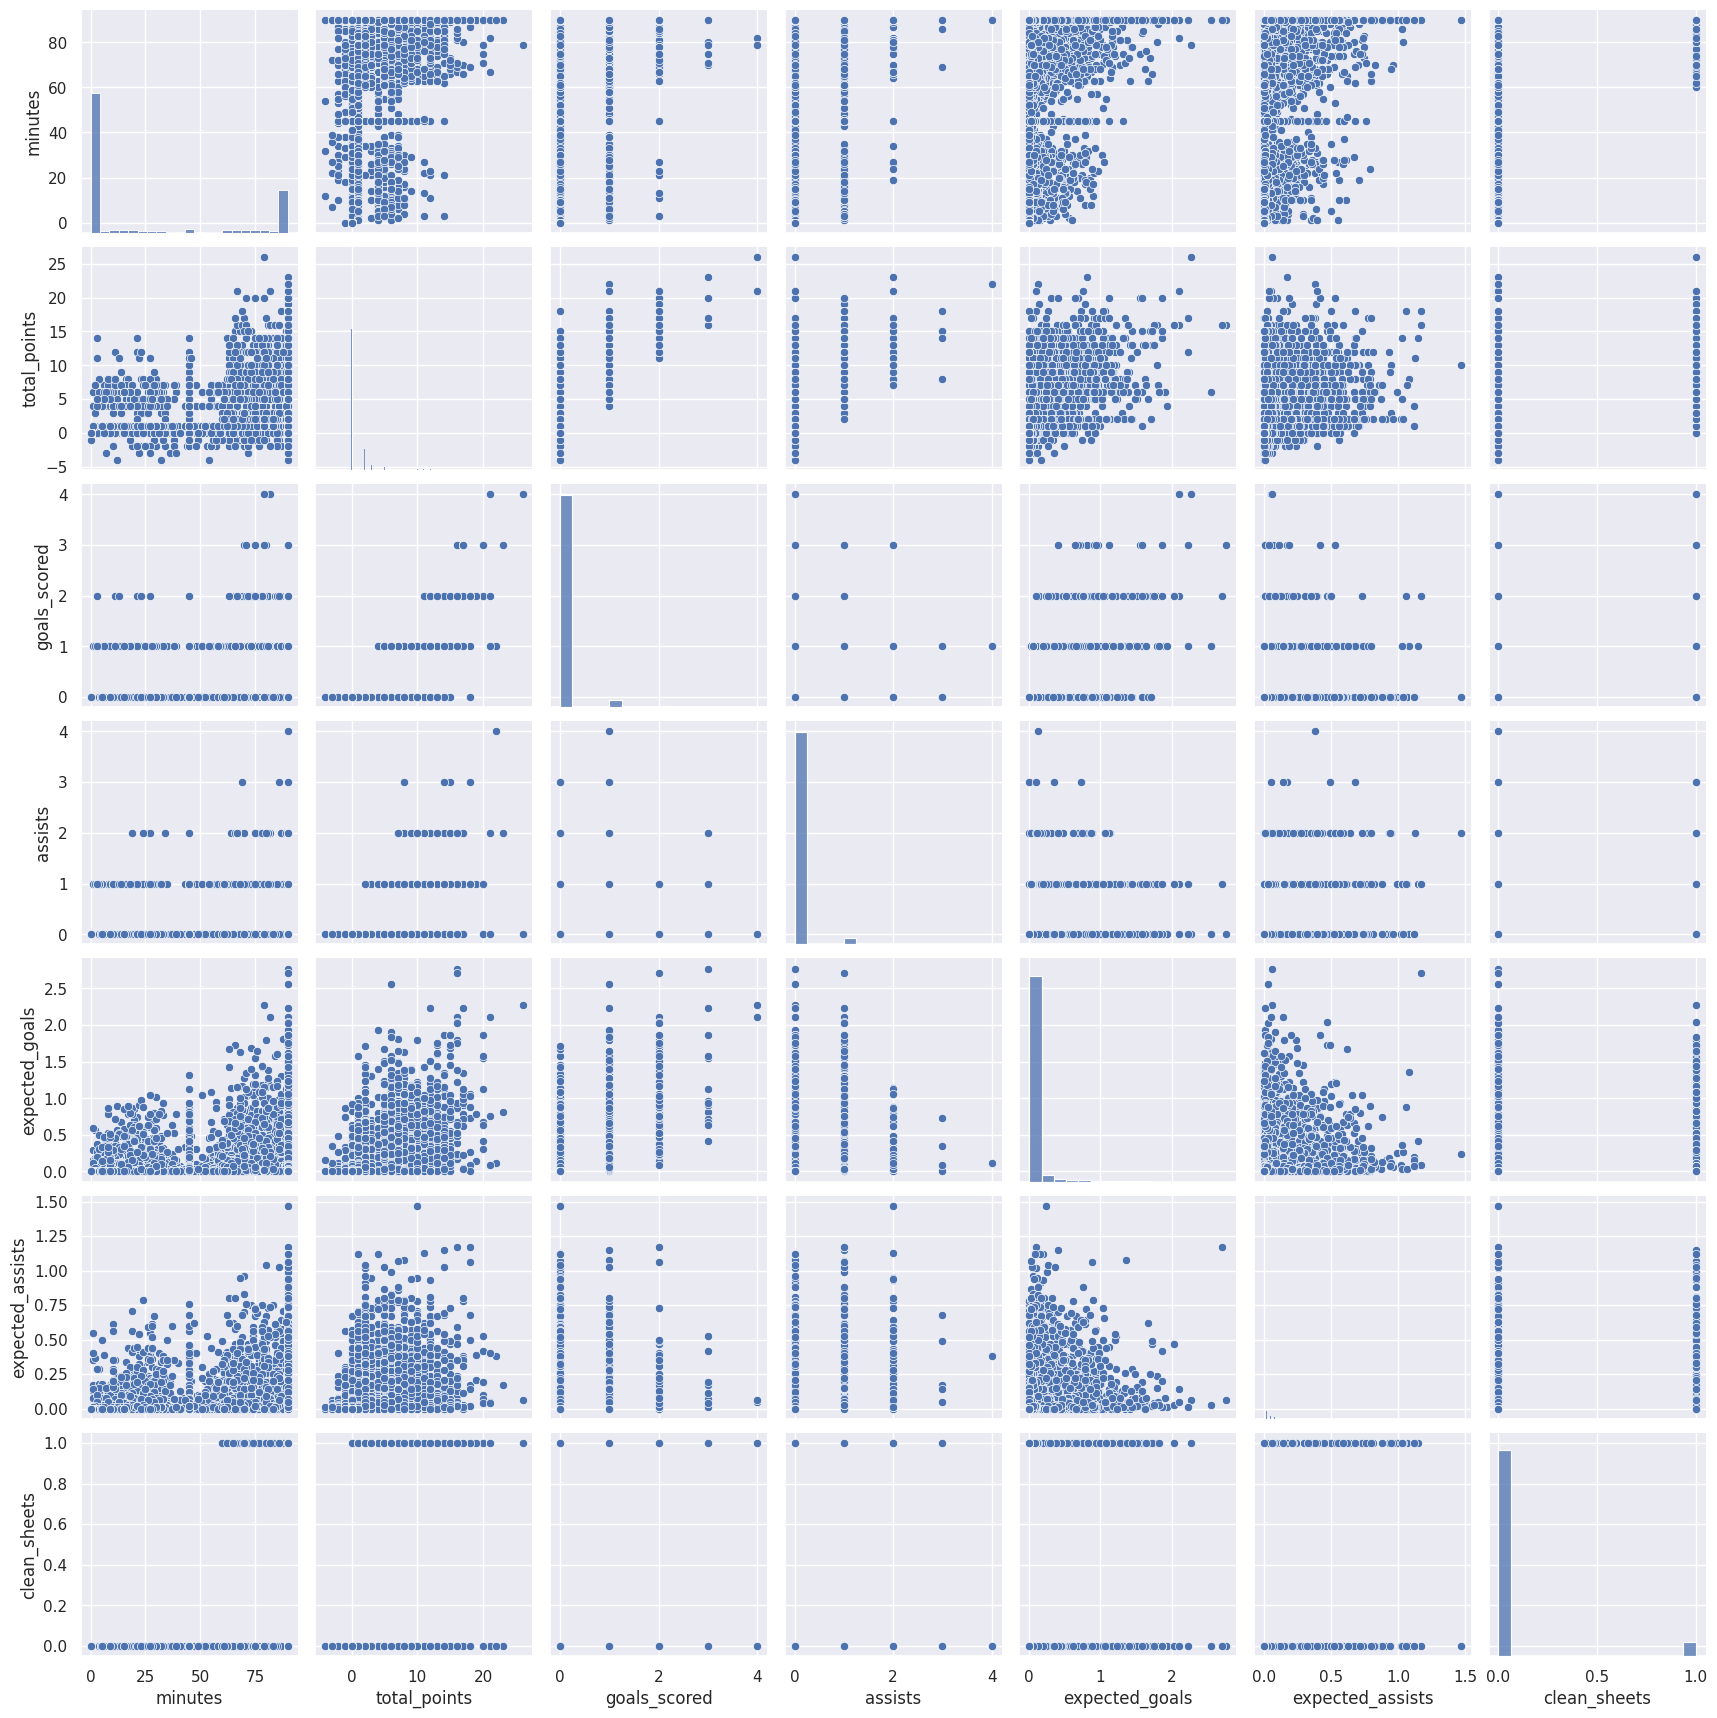

In [11]:
sns.set()
cols = ['minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']
sns.pairplot(df[cols])

<Axes: xlabel='expected_goals', ylabel='total_points'>

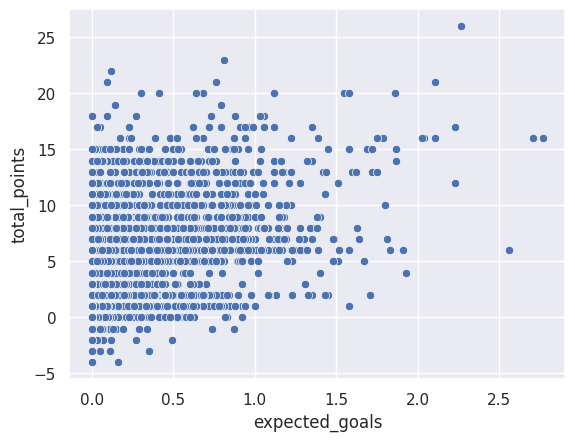

In [12]:
sns.scatterplot(data = df, x = df.expected_goals, y = df.total_points)

<Axes: xlabel='goals_scored', ylabel='total_points'>

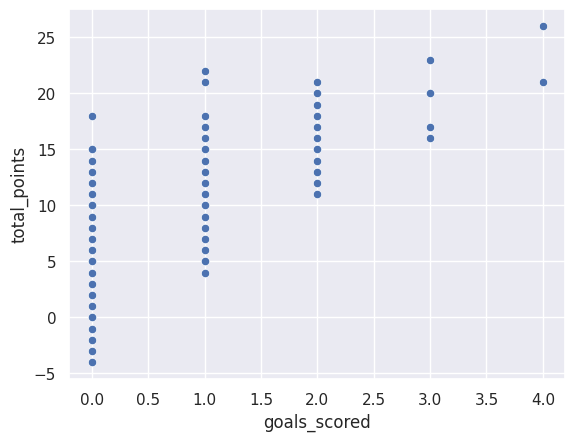

In [13]:
sns.scatterplot(data = df, x = df.goals_scored, y = df.total_points)

<Axes: xlabel='minutes', ylabel='total_points'>

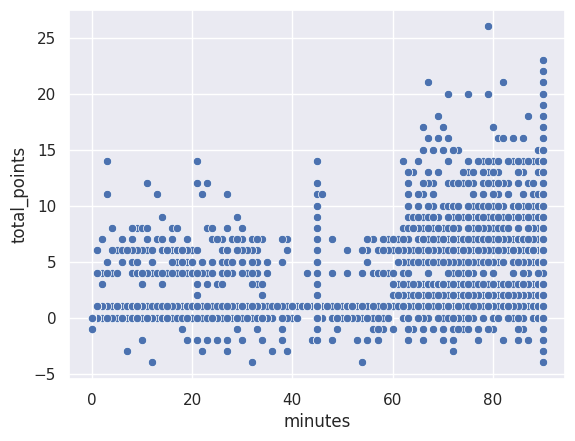

In [14]:
sns.scatterplot(data = df, x = df.minutes, y = df.total_points)

# 3. MODEL

## 3.1 PREPARE THE DATA

In [ ]:
#Let's drop non average columns and split the data before using the model

In [139]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [140]:
df_players_stats_oh.columns

Index(['element', 'opponent_team', 'was_home', 'minutes', 'total_points',
       'goals_scored', 'assists', 'expected_goals', 'expected_assists',
       'clean_sheets', 'avg_minutes', 'avg_points', 'avg_goals', 'avg_xG',
       'avg_assists', 'avg_xA', 'clean_sheets_last3', 'opponent_strength',
       'element_type_1', 'element_type_2', 'element_type_3', 'element_type_4'],
      dtype='object')

In [141]:
df = df_players_stats_oh.drop(columns = ['element', 'opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']) #avg_minutes dropped based on the plots above, rmse dropped

In [142]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='total_points'), df['total_points'], test_size=0.2)

In [134]:
X_train.columns

Index(['was_home', 'avg_minutes', 'avg_points', 'avg_goals', 'avg_xG',
       'avg_assists', 'avg_xA', 'clean_sheets_last3', 'opponent_strength',
       'element_type_1', 'element_type_2', 'element_type_3', 'element_type_4'],
      dtype='object')

## 3.1 GRIDSEARCH

In [7]:
# Using GridSearchCV to find best parameters for RFR
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [25, 50, 100, 250],
                              'max_depth': [2, 3, 5, 10]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,2.113953,0.100862,0.078791,0.007463,5,250,"{'max_depth': 5, 'n_estimators': 250}",0.283669,0.271496,0.290095,0.281754,0.007713
2,0.213251,0.020302,0.009502,0.000469,5,25,"{'max_depth': 5, 'n_estimators': 25}",0.283244,0.274650,0.287083,0.281659,0.005198
3,0.797872,0.013036,0.033139,0.003409,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.282292,0.272721,0.289773,0.281595,0.006979
4,0.396780,0.017194,0.015726,0.000334,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.282566,0.271838,0.288589,0.280998,0.006928
5,3.679638,0.139751,0.151336,0.009264,10,250,"{'max_depth': 10, 'n_estimators': 250}",0.281999,0.257159,0.284446,0.274535,0.012327
6,1.506289,0.064076,0.068768,0.013400,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.279778,0.258132,0.285485,0.274465,0.011782
7,0.287531,0.014774,0.012641,0.000182,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.272757,0.265252,0.273393,0.270467,0.003697
8,0.546858,0.019561,0.021188,0.000304,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.272116,0.265061,0.273176,0.270118,0.003602
9,1.479266,0.031490,0.051861,0.002920,3,250,"{'max_depth': 3, 'n_estimators': 250}",0.271149,0.264650,0.273321,0.269707,0.003684


## 3.3 PREDICTION

In [143]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [144]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 1.9694427914717973
R-squared: 0.276508818461521


In [127]:
y_test_array = y_test.to_numpy()

In [128]:
len(y_test_array)

5910

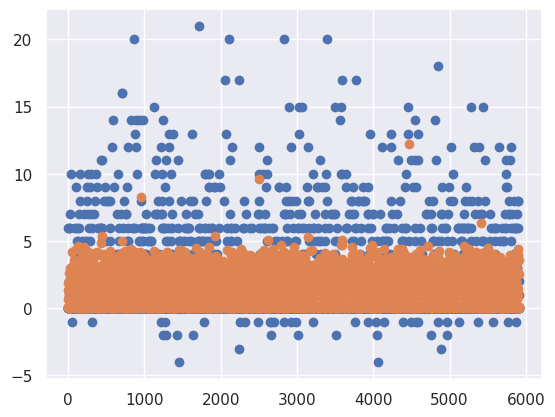

In [129]:
plt.scatter(range(1, 5911), y_test_array) 
plt.scatter(range(1, 5911), predictions) 

# 4. EXPERIMENT ZONE

## 4.1 DROPPING PLAYERS WITH 0 xG

In [106]:
#Let's check what dropping players with 0 xG does

In [163]:
import random

In [164]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [165]:
df = df_players_stats_oh.drop(columns = ['element', 'opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets']) #avg_minutes dropped based on the plots above, rmse dropped

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='total_points'), df['total_points'], test_size=0.2)

In [167]:
X_train['indexes_to_remove'] = [1 if (x == 0 and random.random() < 0.2) else 0 for x in X_train["avg_xG"]]

In [168]:
y_train = y_train[X_train['indexes_to_remove'] == 0]

In [169]:
X_train = X_train[X_train['indexes_to_remove'] == 0]

In [170]:
X_train = X_train.drop(columns = ['indexes_to_remove'])

In [171]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [172]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 1.9478857881875107
R-squared: 0.2866802021915832


In [173]:
y_test_array = y_test.to_numpy()

In [174]:
len(y_test_array)

5910

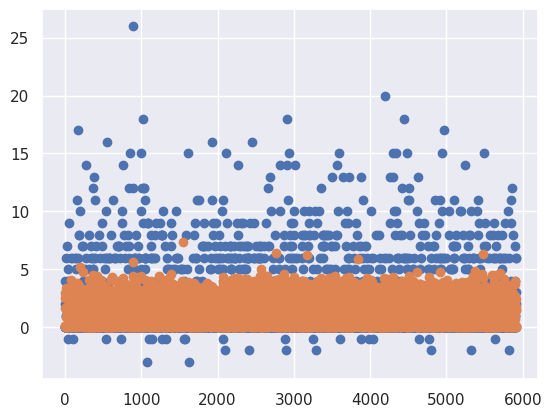

In [175]:
plt.scatter(range(1, 5911), y_test_array) 
plt.scatter(range(1, 5911), predictions) 

## 4.2 PCA CHECK

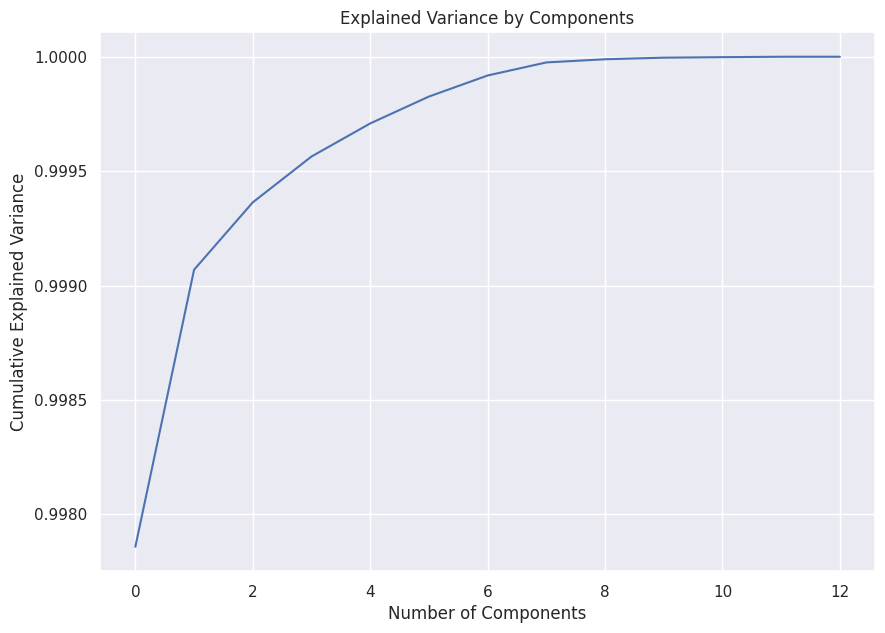

In [48]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,7))
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

In [105]:
#TO DO: WERYFIKACJA WYNIKU PCA - DATASET MOŻNA OPISAĆ JEDNĄ KOLUMNĄ?

## 4.3 DROPPING NEGATIVE SCORES AND >10

In [54]:
#Let's try to drop from X_train and y_train values where: total points are negative and total points are over 10

In [55]:
import random

In [56]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [57]:
df = df_players_stats_oh.drop(columns = ['element', 'opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='total_points'), df['total_points'], test_size=0.2)

In [59]:
y_train = y_train.to_frame()

In [60]:
y_train['cols_to_remove'] = y_train['total_points'].apply(lambda x: 1 if x > 10 else 0)

In [61]:
X_train = X_train[y_train['cols_to_remove'] == 0]

In [62]:
y_train = y_train[y_train['cols_to_remove'] == 0]

In [66]:
y_train['cols_to_remove'] = [1 if (x == 0 and random.random() < 0) else 0 for x in y_train["total_points"]]

In [67]:
X_train = X_train[y_train['cols_to_remove'] == 0]

In [68]:
y_train = y_train[y_train['cols_to_remove'] == 0]

In [69]:
y_train.drop(columns = ['cols_to_remove'], inplace = True)

In [70]:
y_train = pd.Series(y_train['total_points'])

In [71]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [72]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 1.9968698951313972
R-squared: 0.22721770583040424


In [73]:
y_test_array = y_test.to_numpy()

In [74]:
len(y_test_array)

5910

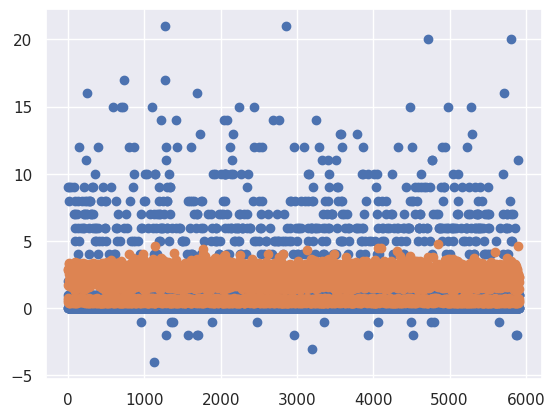

In [75]:
plt.scatter(range(1, 5911), y_test_array) 
plt.scatter(range(1, 5911), predictions) 

## 4.4 MODEL PERFORMANCE FOR OVERPERFORMING PLAYER

In [76]:
#Let's try to predict performance of 1 OVERPERFORMING player based on the data on all of other players. Example Bryan Mbuemo id = 108

In [77]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [78]:
df = df_players_stats_oh.drop(columns = ['opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets'])

In [79]:
X_train = df.drop(df[df['element'] == 108].index)

In [80]:
X_train = X_train.drop(columns = ['element'])

In [81]:
y_train = X_train['total_points']

In [82]:
X_train = X_train.drop(columns = ['total_points'])

In [83]:
X_test = df[df['element'] == 108]

In [84]:
y_test = X_test['total_points']

In [85]:
X_test = X_test.drop(columns = ['total_points', 'element'])

In [86]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [87]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 3.931539960413271
R-squared: 0.18483921957885774


In [88]:
y_test_array = y_test.to_numpy()

In [89]:
len(y_test_array)

38

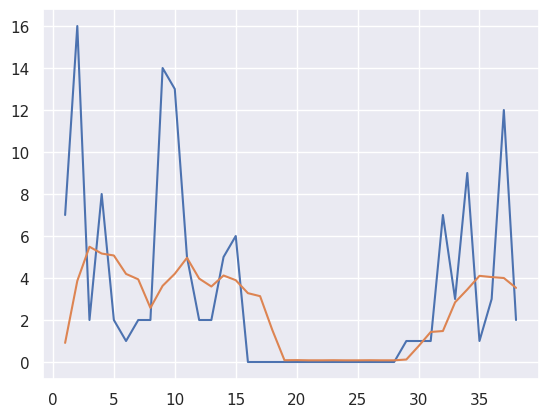

In [90]:
plt.plot(range(1, 39), y_test_array) 
plt.plot(range(1, 39), predictions) 

## 4.5 MODEL PERFORMANCE FOR AVERAGE PERFORMING PLAYER

In [91]:
#Let's do the same for AVERAGE player. Fe. Pedro Neto id = 567

In [92]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')

In [93]:
df = df_players_stats_oh.drop(columns = ['opponent_team', 'minutes', 'goals_scored', 'assists', 'expected_goals', 'expected_assists', 'clean_sheets'])

In [94]:
X_train = df.drop(df[df['element'] == 567].index)

In [95]:
X_train = X_train.drop(columns = ['element'])

In [96]:
y_train = X_train['total_points']

In [97]:
X_train = X_train.drop(columns = ['total_points'])

In [98]:
X_test = df[df['element'] == 567]

In [99]:
y_test = X_test['total_points']

In [100]:
X_test = X_test.drop(columns = ['total_points', 'element'])

In [101]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [102]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 2.5873013007204264
R-squared: 0.3364689139274656


In [103]:
y_test_array = y_test.to_numpy()

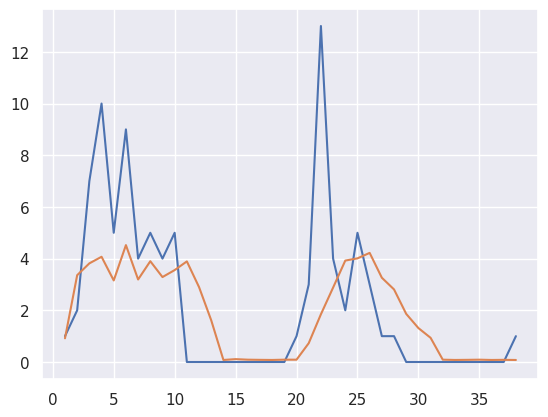

In [104]:
plt.plot(range(1, 39), y_test_array) 
plt.plot(range(1, 39), predictions) 

In [ ]:
#TO DO: ZMIENIĆ OKNO DO ŚREDNI Z 3 MECZÓW DO 2 I SPRAWDZIĆ WYNIKI